In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read The Dataset

In [270]:
df=pd.read_csv("train.csv")
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [271]:
df.shape

(165034, 14)

In [272]:
df.select_dtypes(include=np.number).columns

Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [273]:
df.select_dtypes(exclude=np.number).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

### check for the null values

In [274]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [275]:
### five point summary

In [276]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [277]:
df["CustomerId"].nunique()

23221

In [278]:
df["id"].nunique()

165034

In [279]:
df.duplicated(subset='CustomerId').sum()

141813

In [280]:
df.drop(columns="id",inplace=True)

In [281]:
df["Geography"].value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

In [282]:
df["Gender"].value_counts()

Male      93150
Female    71884
Name: Gender, dtype: int64

In [283]:
df["Surname"].value_counts()

Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: Surname, Length: 2797, dtype: int64

In [284]:
df["CustomerId"].value_counts()

15682355    121
15570194     99
15585835     98
15595588     91
15648067     90
           ... 
15635203      1
15806982      1
15691104      1
15624936      1
15815050      1
Name: CustomerId, Length: 23221, dtype: int64

### Visulisation

In [285]:
import plotly.express as px
fig = px.sunburst(
    df,
    path=['Geography','Gender','NumOfProducts','IsActiveMember','Exited'], 
    color='Exited',color_discrete_map={'1':'gold', '0':'darkblue'},
    width=1200, height=1200
)
fig.show()

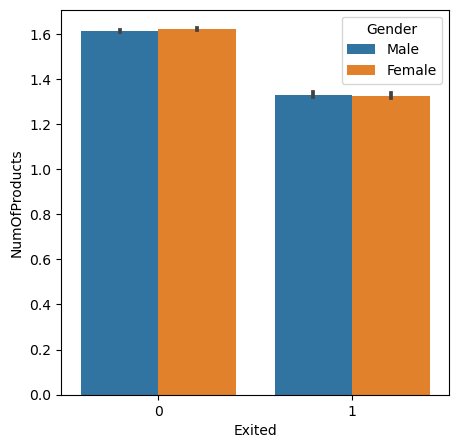

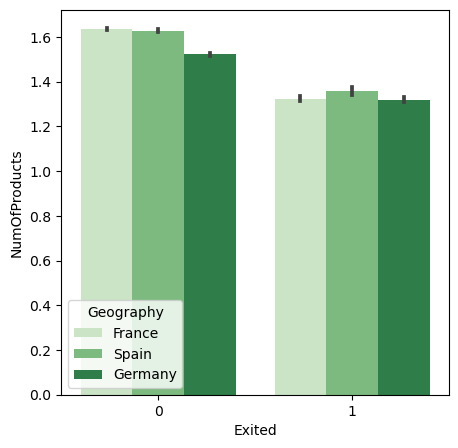

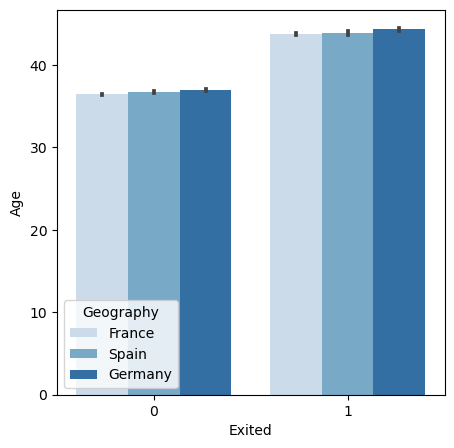

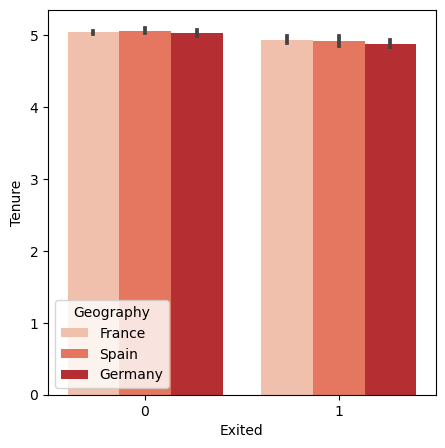

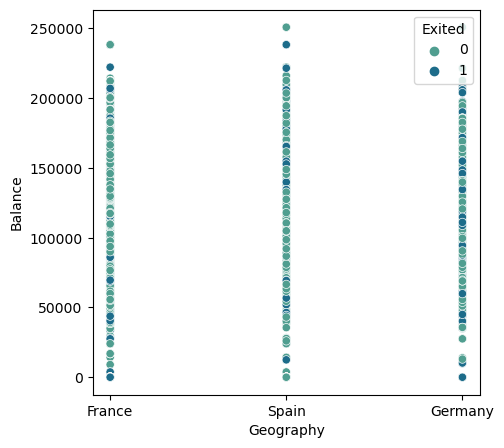

In [286]:
plt.figure(figsize=(5, 5))
s=sns.barplot(df,y='NumOfProducts',x='Exited',hue='Gender')
plt.figure(figsize=(5, 5))
s=sns.barplot(df,y='NumOfProducts',x='Exited',hue='Geography', palette='Greens')
plt.figure(figsize=(5, 5))
s=sns.barplot(df,y='Age',x='Exited',hue='Geography',palette='Blues')
plt.figure(figsize=(5, 5))
s=sns.barplot(df,y='Tenure',x='Exited',hue='Geography',palette='Reds')
plt.figure(figsize=(5, 5))
s=sns.scatterplot(df,y='Balance',x='Geography',hue='Exited',palette='crest')

In [287]:
import warnings
warnings.filterwarnings("ignore")

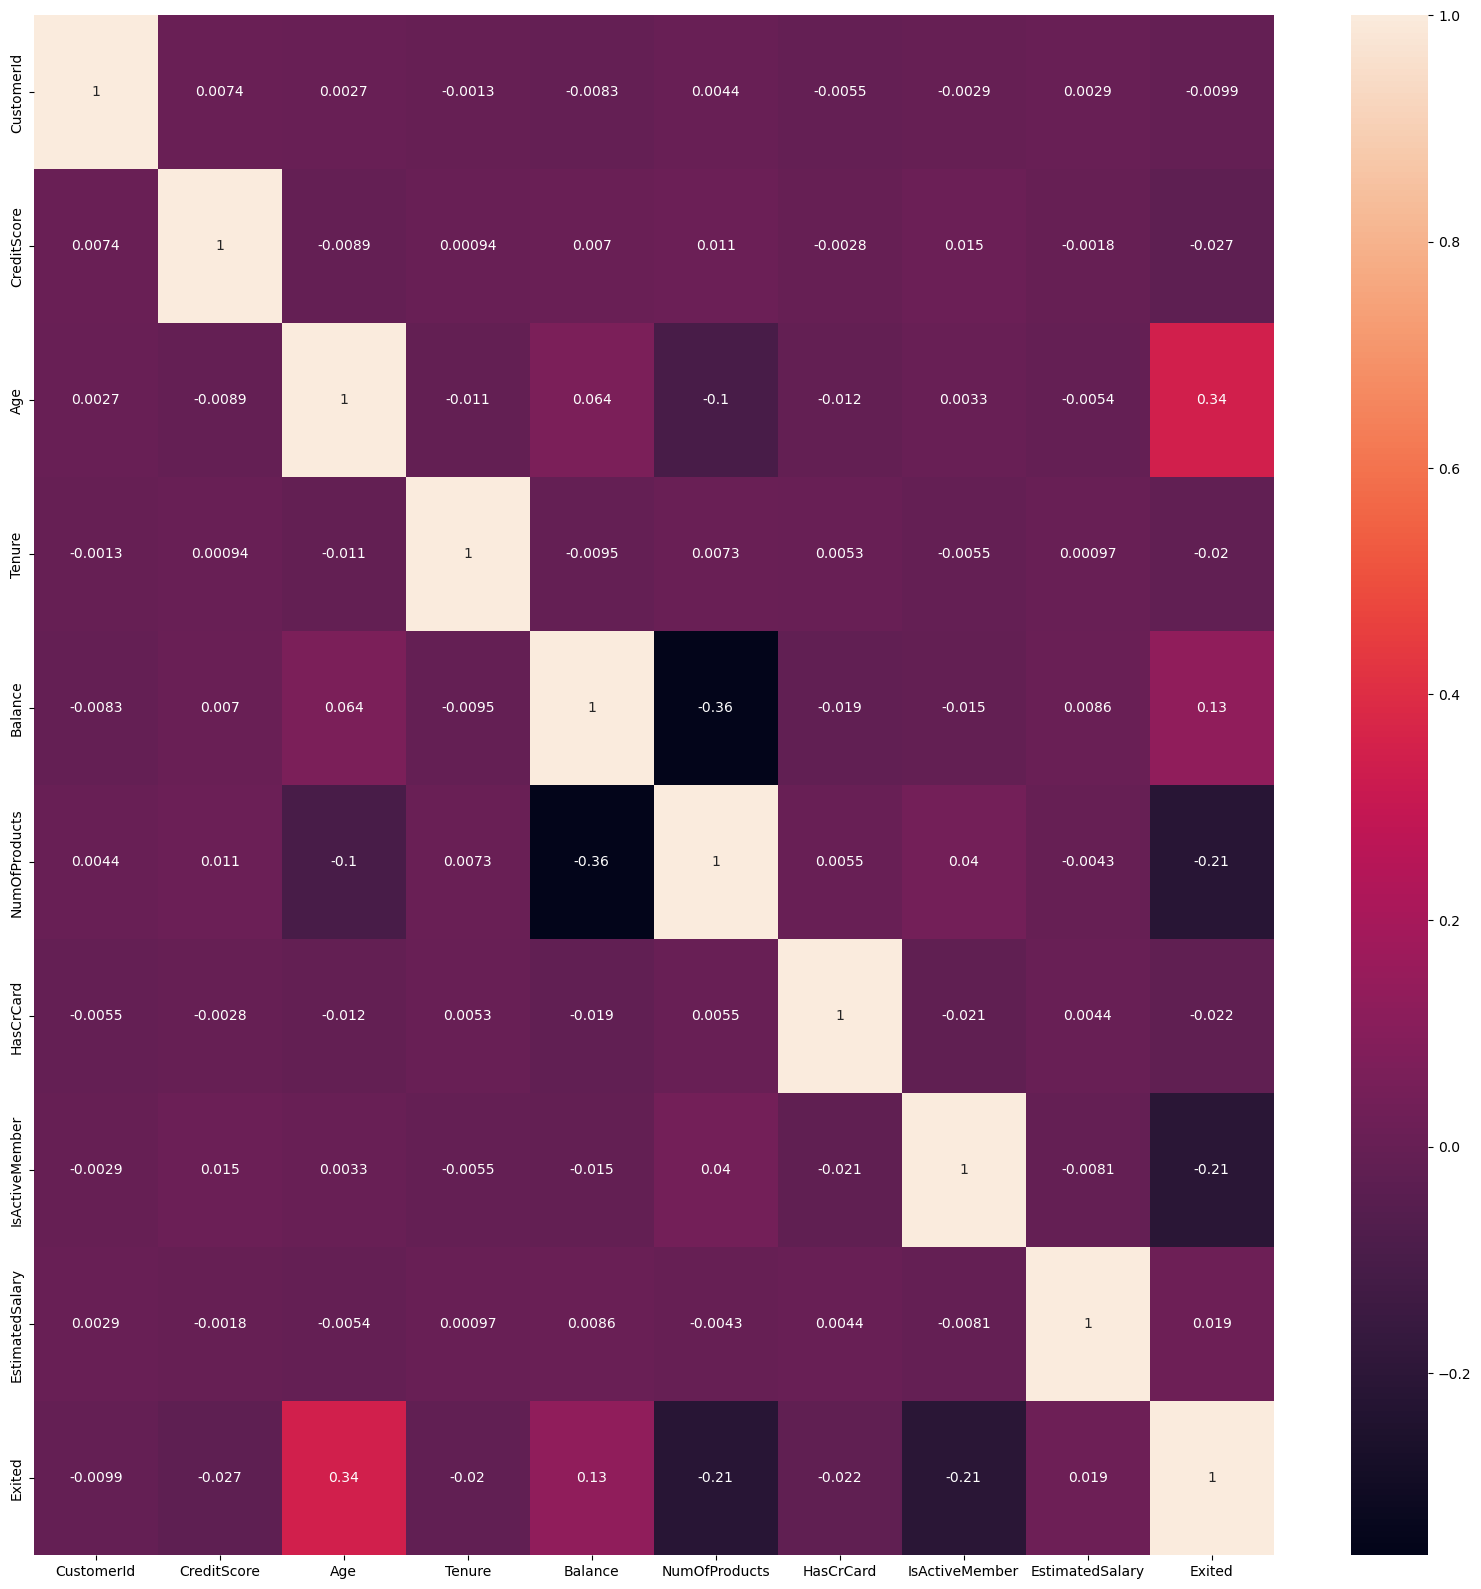

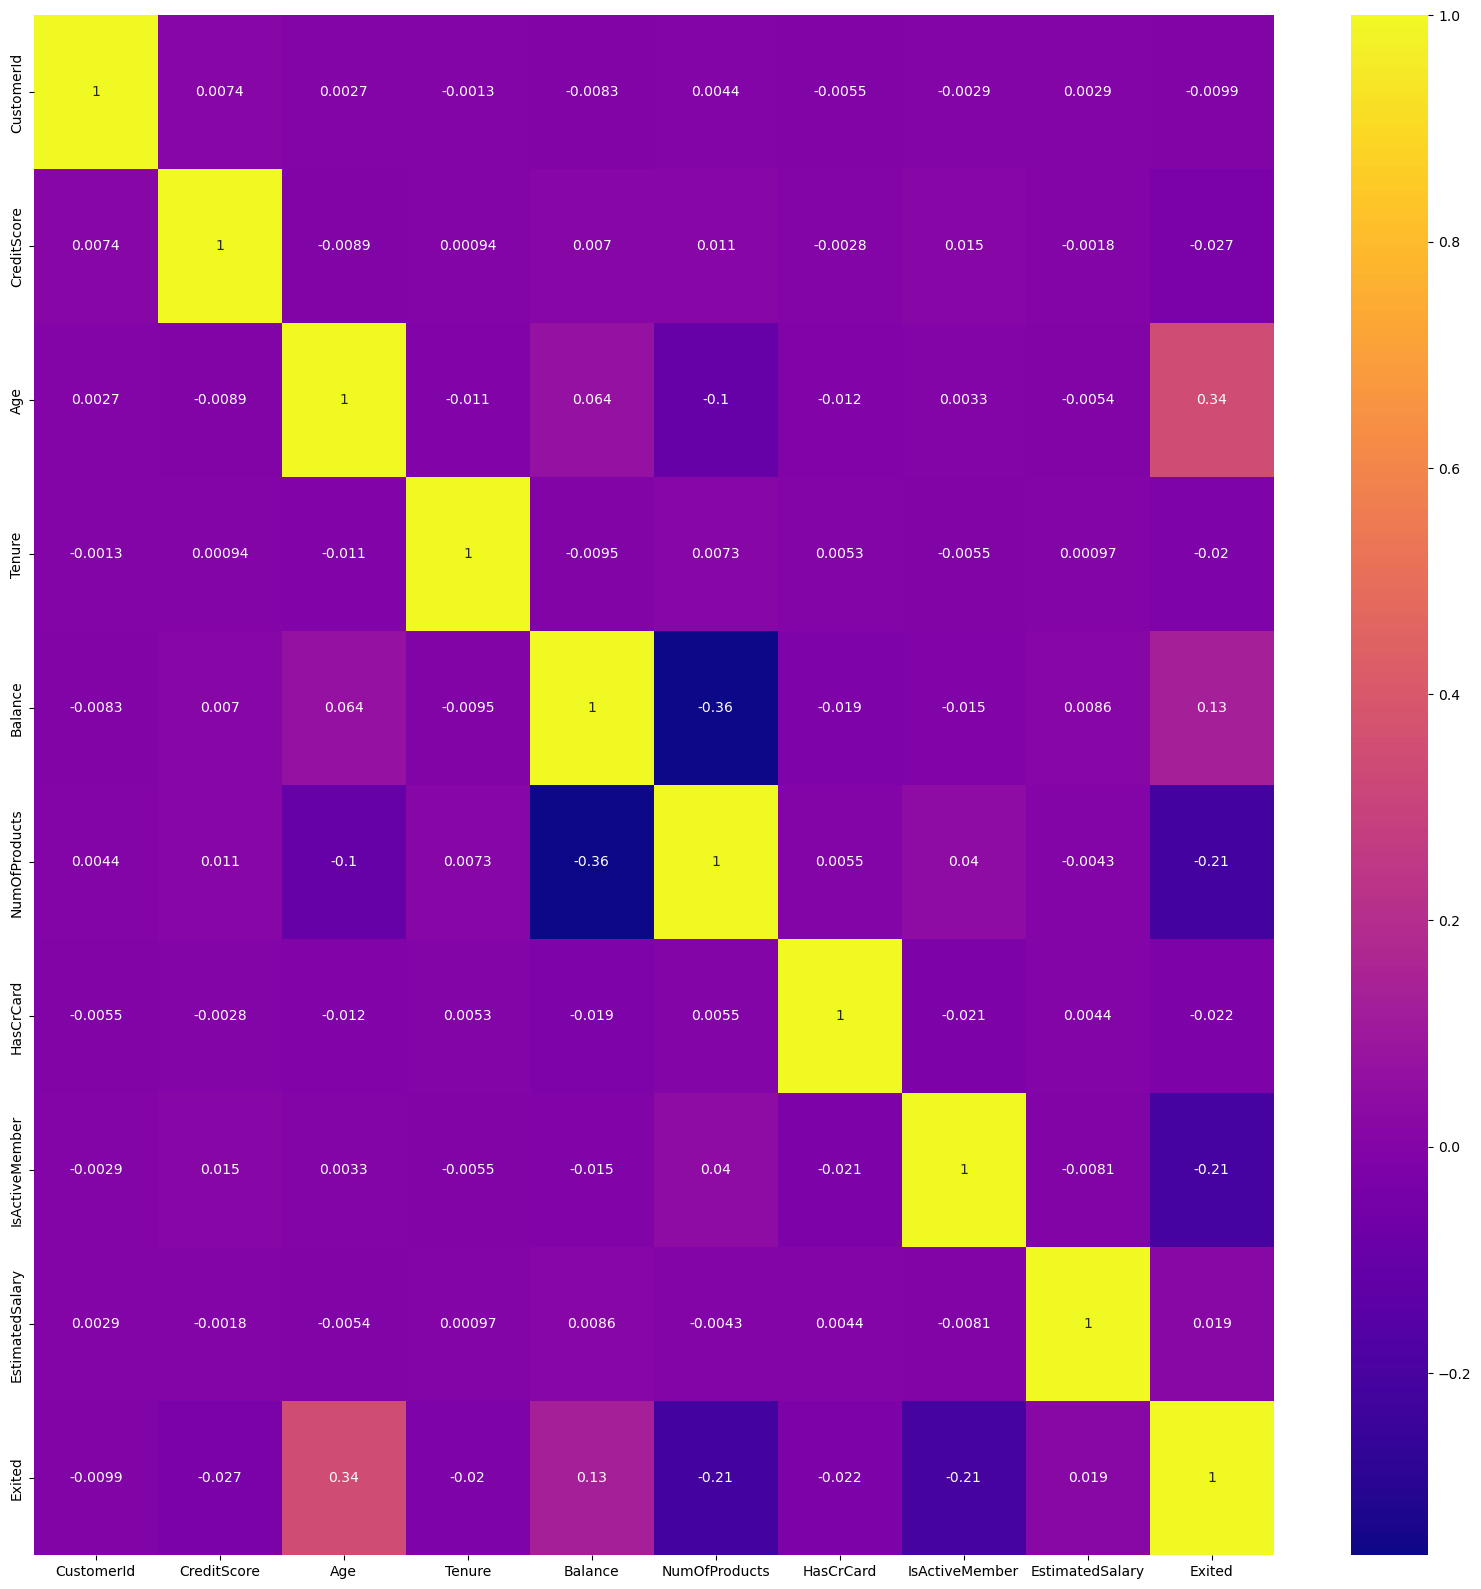

In [288]:
corr = df.corr()
# plot the heatmap
plt.figure(figsize=(20, 20))
s=sns.heatmap(corr,annot=True)
corr = df.corr()
# plot the heatmap
plt.figure(figsize=(20, 20))
s=sns.heatmap(corr,annot=True, cmap='plasma')

In [289]:
#droping columns according to reqirement

In [290]:
df.drop(columns=["Surname","CustomerId"],inplace=True)

In [291]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [292]:
df['cred_score']=df["CreditScore"].apply(lambda x: "350-450" if 450>=x>=350 else "451-550"
                       if 550>=x>451 else "551-650"
                       if 650>=x>551 else "651-750"
                       if 750>=x>651 else "751-850")

In [293]:
df.groupby("cred_score")["Exited"].value_counts()

cred_score  Exited
350-450     0           718
            1           224
451-550     0         11145
            1          3557
551-650     0         46325
            1         13302
651-750     0         55929
            1         13721
751-850     0         15996
            1          4117
Name: Exited, dtype: int64

In [294]:
df.drop(columns="CreditScore",inplace=True)

### train test split

In [295]:
x=df.drop(columns="Exited")
y=df["Exited"]

In [296]:
x_num=x.select_dtypes(include=np.number)
x_cat=x.select_dtypes(exclude=np.number)

In [297]:
dummy_x=pd.get_dummies(x_cat,drop_first=True)

In [298]:
#scaling

In [299]:
from sklearn.preprocessing import StandardScaler

In [300]:
sc=StandardScaler()

In [301]:
scaled_x=pd.DataFrame(sc.fit_transform(x_num),columns=x_num.columns)

In [302]:
x=pd.concat([scaled_x,dummy_x],axis=1)

In [303]:
from sklearn.model_selection import train_test_split

In [304]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

### Logistic Regression model

In [305]:
from sklearn.linear_model import LogisticRegression

In [306]:
lr=LogisticRegression()

In [307]:
lr_model=lr.fit(xtrain,ytrain)

In [308]:
ypred_test=lr_model.predict(xtest)

In [309]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score,precision_score,\
recall_score,f1_score,ConfusionMatrixDisplay,cohen_kappa_score

In [310]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     32611
           1       0.69      0.38      0.49      8648

    accuracy                           0.83     41259
   macro avg       0.77      0.67      0.70     41259
weighted avg       0.82      0.83      0.82     41259



In [311]:
score_card_without_smote = pd.DataFrame(columns=['Model name', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(model, name):
    
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)
    
    global score_card_without_smote

    score_card_without_smote = score_card_without_smote.append({'Model name' : name,
                                    'AUC Score' : roc_auc_score(ytest, ypred_test),
                                    'Precision Score': precision_score(ytest, ypred_test),
                                    'Recall Score': recall_score(ytest, ypred_test),
                                    'Accuracy Score': accuracy_score(ytest, ypred_test),
                                    'Kappa Score': cohen_kappa_score(ytest, ypred_test),
                                    'f1-score': f1_score(ytest, ypred_test, average='macro')}, 
                                    ignore_index = True)
    
    ConfusionMatrixDisplay.from_predictions(ytest,ypred_test,cmap="Blues")
    plt.show()

    return(score_card_without_smote)

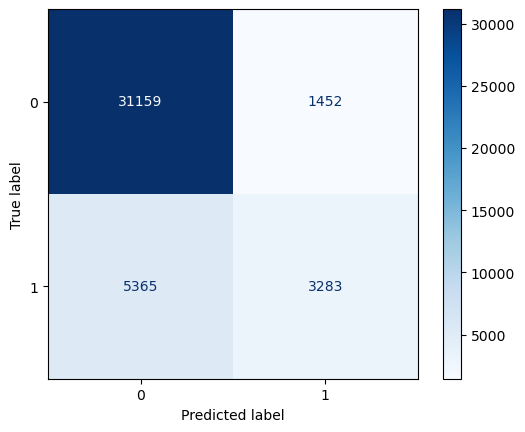

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic model,0.66755,0.693347,0.379625,0.834775,0.401916,0.696009


In [312]:
update_score_card(lr_model, 'Logistic model')

### XGBoost Classifier

In [313]:
from xgboost.sklearn import XGBClassifier

In [314]:
xgb_model= XGBClassifier(n_estimators=150,max_depth=6,learning_rate=0.1,gamma=5)
xgb_model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [315]:
ypred_test=xgb_model.predict(xtest)

In [316]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     32611
           1       0.74      0.55      0.63      8648

    accuracy                           0.87     41259
   macro avg       0.81      0.75      0.78     41259
weighted avg       0.86      0.87      0.86     41259



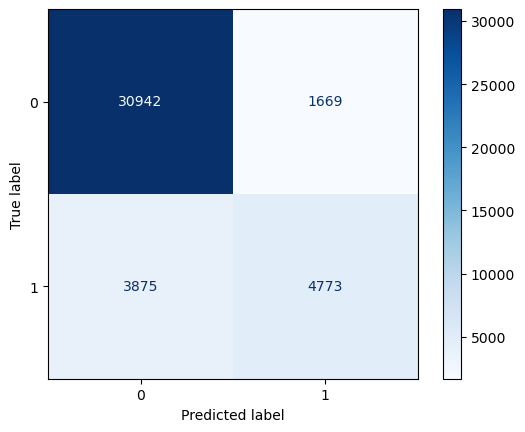

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic model,0.66755,0.693347,0.379625,0.834775,0.401916,0.696009
1,XGboost model,0.75037,0.740919,0.551920,0.865629,0.552524,0.775192


In [317]:
update_score_card(xgb_model, 'XGboost model')

### submission

In [318]:
test=pd.read_csv("test.csv")

In [319]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [321]:
submission=pd.DataFrame(test["id"])

In [322]:
test.drop(columns=["id","CustomerId","Surname"],inplace=True)

In [323]:
test['cred_score']=test["CreditScore"].apply(lambda x: "350-450" if 450>=x>=350 else "451-550"
                       if 550>=x>451 else "551-650"
                       if 650>=x>551 else "651-750"
                       if 750>=x>651 else "751-850")

In [324]:
test.drop(columns="CreditScore",inplace=True)

In [325]:
scaled_test=pd.DataFrame(sc.fit_transform(test.select_dtypes(include=np.number)),columns=test.select_dtypes(include=np.number).columns)

In [326]:
dummy_test=pd.get_dummies(test.select_dtypes(exclude=np.number),drop_first=True)

In [327]:
final_test=pd.concat([scaled_test,dummy_test],axis=1)

In [328]:
res=xgb_model.predict_proba(final_test)

In [329]:
test["Exited"]=np.round([i[1] for i in res],1)

In [331]:
submission["Excited"]=test["Exited"]

In [334]:
submission.to_csv("submission.csv",index=None)

In [335]:
pd.read_csv("submission.csv")

,id,Excited
0,165034,0.0
1,165035,0.8
2,165036,0.0
3,165037,0.2
4,165038,0.4
...,...,...
110018,275052,0.0
110019,275053,0.1
110020,275054,0.0
110021,275055,0.2
